# Sorting Algorithms

We will cover the topic of *sorting algorithms*, or more specifically, *comparison sorts*. Comparison sorts are sorting algorithms that work by sorting a sequence of items (letters, numbers, objects)
in which the order must be worked out by comparing objects. For example, sorting a list of numbers from smallest to largest is a comparison sort: to find the largest of two numbers, we compare them.


## Bubble Sort

One of the simplest sorting algorithms, also previously covered, is the *bubble sort* algorithm. Let us look at one implementation.


```{figure} ../../figures/bubble-sort.gif
---
width: 400px
name: bubble_sort
alt: bubble_sort
---
Source: taken from [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/c/c8/Bubble-sort-example-300px.gif).
```


First, we define a swap method to swap two elements in the sequence
```C++
void swap(int &a, int &b)
{
    int temp = a;
    a = b;
    b = temp;
}
```
Recall that this works because we are doing a call by reference, using `&`.

Now, we implement bubble sort with in-place sorting. With in-place sorting, we need to do a call-by-reference.
```C++
void bubble_sort(vector<int> &input)
{
    for (int end = input.size(); end > 0; end--)
    {
        for (int i = 0; i < end - 1; i++)
        {
            if (input[i] > input[i + 1])
            {
                swap(input[i], input[i + 1]);
            }
        }
    }
}
```
Let us analyze the cost of this algorithm. We first iterate through the whole list, after which the biggest element will be last. This means that the subsequent iteration can now be done through
the whole list except the last element. Similarly, every new iteration requires going to one less element than the last one. For each iteration, we perform at least one comparison and perhaps a swap.
Suppose that, for each iteration, we do $c$ operations. This gives us the sum

$$
	(n-1)c + (n-2)c + (n-3)c + \ldots + 2c + c.
$$

This sum represents essentially a triangle number, which can be expressed as $\frac{n(n-1)}{2}c$.

As before, the coefficients and lower-order terms are unimportant, so the complexity analysis can be summarized by saying that bubble sort takes $\mathcal{O}(n^2)$ operations.
Doubling the length of the input list makes bubble sort take roughly four times longer to sort the list.

Note that the algorithm is $\mathcal{O}(n^2)$ in the worst case and in the best case. Indeed, even if we are not doing any swaps, we still perform $\mathcal{O}(n^2)$ comparisons.
This means that even in the best case in which we start with an *already sorted list*, bubble sort will spend $\mathcal{O}(n^2)$ operations to "sort" it. This can be improved.

### An improved bubble sort

To improve our algorithm, we can abort it if we have iterated through the whole list without making any swaps. This can be achieved by adding a boolean flag as follows
```C++
void bubble_sort(vector<int> &input)
{
    bool swapped;
    for (int end = input.size(); end > 0; end--)
    {
        swapped = false;
        for (int i = 0; i < end - 1; i++)
        {
            if (input[i] > input[i + 1])
            {
                swap(input[i], input[i + 1]);
                swapped = true;
            }
        }
        if (swapped == false)
        {
            return;
        }
    }
}
```

In the worst-case scenario, we still need to carry out all the same iterations as before, so the worst case has not improved with this new algorithm.
Fortunately, this worst-case scenario did not get any worse either; We added a few constant steps into the algorithm, changing only the coefficients, which we already know are not considered.

The best-case scenario, however, has improved. If we send in a sorted list, the new algorithm iterates through it once, doing $(n-1)$ comparisons.
After that, no elements are swapped, and the algorithm terminates, such that the best case costs $\mathcal{O}(n)$.


## Selection Sort

A different sorting algorithm, which we have not covered, but which is perhaps even simpler than bubble sort, is *selection sort*. This algorithm consists of two simple steps
* Find the smallest element in the list that has not been moved yet
* Put it into its correct index


```{figure} https://upload.wikimedia.org/wikipedia/commons/b/b0/Selection_sort_animation.gif
---
width: 300px
name: selection_sort
alt: selection_sort
---
A selection sort gif linked from Wikipedia.
```

A possible implementation of selection sort is as follows

```C++
void selection_sort(vector<int> &input)
{
    int smallest; // stores index, not value

    for (int i = 0; i < input.size(); i++)
    {
        // Find smallest element
        smallest = i;
        for (int j = i + 1; j < input.size(); j++)
        {
            if (input[j] < input[smallest])
            {
                smallest = j;
            }
        }

        // Place into its correct spot
        swap(input[i], input[smallest]);
    }
}
```

### The Cost of Selection sort

This sorting algorithm consists of two loops. The outer loop iterates over each element in the list, repeating $n$ times. For each iteration, we loop over the remaining $n-i$ elements of the list,
meaning we again get a triangle number sum

$$
	n + (n-1) + (n-2) + \ldots + 1 = \frac{n(n+1)}{2}.
$$

In cases such as this, doing "$n-i$" loops can simply be assumed to be $\mathcal{O}(n)$.

So we have two nested loops: the outer one of $n$ iterations and the inner one of roughly $n$ iterations. The total cost is, therefore, $\mathcal{O}(n^2)$.

As for our first bubble sort implementation, this cost accounts for both the best and the worst case of the algorithm. Unfortunately, in this case, we cannot simply add the "swap" flag solution to improve one of the cases.
We could, of course, add the step: "Check to see if the list is sorted" first, but this would add a step that is only sometimes useful and which has nothing to do with the specific algorithm.
Notice the difference between this check and what we did with the bubble: in that example, we were already comparing all elements, to begin with; the added cost was $\mathcal{O}(1)$, not $\mathcal{O}(n)$.


## Are Bubble Sort and Selection Sort "good" sorting algorithms?

While these algorithms are easy to implement and require little code, they are both, as we have seen, $\mathcal{O}(n^2)$, scaling poorly with the input size.

Not only is it possible to do better than this, but we also know how much better. We have shown that the lower limit for both the average case and the worst case of comparison sorting is
$\mathcal{O}(n\log n)$, which is much better than $\mathcal{O}(n^2)$. To see why it is better, recall that $n^2 = n\cdot n$. In comparison, $n \cdot \log n$ is multiplying by $\log n$ instead of $n$,
which is much smaller. The growth of a $\mathcal{O}(n \log n)$ is therefore close to linear, hence the name *loglinear growth*. The best case has a lower limit of $\mathcal{O}(n)$:
to know if a list is sorted, we need to carry out at least $n-1$ comparisons, which must be $\mathcal{O}(n)$.

Has any practical algorithm reached this theoretical limit? Yes, indeed, most of the used sorting algorithms are $\mathcal{O}(n\log n)$ in both the average and the worst case.
In fact, it is staggering how many there ate to choose from. The following material on [sorting algorithms](https://www.geeksforgeeks.org/sorting-algorithms/) contains a summary comparing many of the most
well-known algorithms and their computational costs.

We will not go through many of these sorting algorithms and how they work, but taking the time to look through the [suggested material](https://www.geeksforgeeks.org/sorting-algorithms/) can be a good idea to get familiar with some of the different options.
One of the most popular algorithms, *quicksort*, is actually $\mathcal{O}(n^2)$, but it has been shown that in most realistic inputs, it has complexity $\mathcal{O}(n\log n)$. This makes its average
cost $\mathcal{O}(n\log n)$, meaning it will often be the fastest in practice. Other popular choices of good and fast sorting algorithms are *mergesort* and *heapsort*.

At this point, an interesting question might be what sorting algorithm the built-in Python `sort` uses. The answer is [Timsort](https://www.geeksforgeeks.org/timsort/), a special sorting
algorithm made for Python in 2002. It is a hybrid between *mergesort* and *insertion sort*.


## Visualizing Sorting Algorithms

As there are so many sorting algorithms out there, an interesting way to compare them is to visualize their sorting process. This can be done in many ways, for example, as shown in the video below,
containing 15 different sorting algorithms on lists of various sizes.

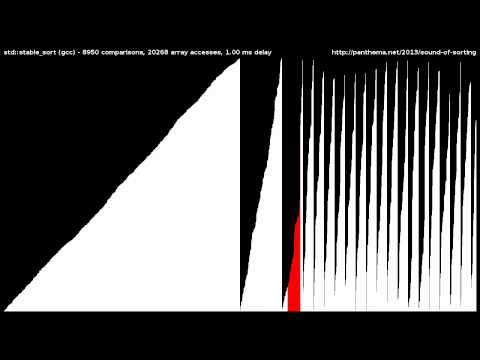

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("kPRA0W1kECg", width=560, height=315)

## Sorting Folk Dances

Another interesting example is the one by Sapientia University, which has created a whole list of sorting algorithms explanations through traditional folk dances.
These are shared through the Youtube channel [AlgoRythmics](https://www.youtube.com/user/AlgoRythmics/videos). Below, there is one example of their videos illustrating the *insert-sort* algorithm.

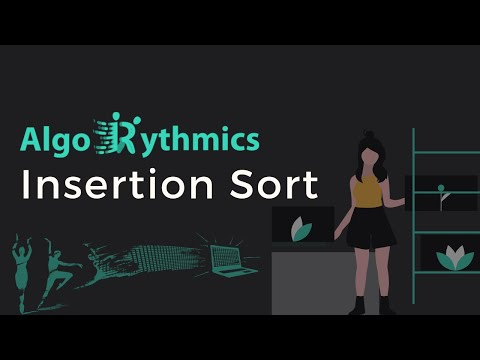

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo("ROalU379l3U", width=560, height=315)